In [22]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [23]:
!conda install -c conda-forge tqdm praw nodejs -y

Solving environment: ...working... done

# All requested packages already installed.



In [24]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager

An error occured.
ValueError: Please install nodejs >=10.0.0 before continuing. nodejs may be installed using conda or directly from the nodejs website.
See the log file for details:  C:\Users\coope\AppData\Local\Temp\jupyterlab-debug-yzfb9toh.log


Fail to get yarn configuration. C:\Users\coope\anaconda3\lib\site-packages\jupyterlab\staging\yarn.js:357

let buildActionsForCopy = (() => {

^^^

SyntaxError: Unexpected strict mode reserved word

    at exports.runInThisContext (vm.js:73:16)

    at Module._compile (module.js:443:25)

    at Object.Module._extensions..js (module.js:478:10)

    at Module.load (module.js:355:32)

    at Function.Module._load (module.js:310:12)

    at Function.Module.runMain (module.js:501:10)

    at startup (node.js:129:16)

    at node.js:814:3




In [72]:
import praw  # Import the Praw library: https://praw.readthedocs.io/en/latest/code_overview/reddit_instance.html
import pandas as pd  # Import Pandas library: https://pandas.pydata.org/
import datetime as dt  # Import datetime library
import matplotlib.pyplot as plt  # Import Matplot lib for plotting
from tqdm.notebook import tqdm  # progress bar used in loops

import credentials  # file with our API credentials as variables

In [94]:
reddit = praw.Reddit(client_id=credentials.client_id,
                     client_secret=credentials.client_secret,
                     user_agent=credentials.user_agent)

In [95]:
subreddit = reddit.subreddit('democrats').top('month', limit = 50)# Define the subreddit of interest. Here we are taking the top 100 posts under 'All' from the past month
len(list(subreddit))

50

In [96]:
for submission in subreddit:
    print(submission.title, submission.score)

In [97]:
subreddit = reddit.subreddit('democrats').top('month', limit = 50)

In [98]:
topics_dict = []  
topics_dict = { "title":[],   
                "score":[], 
                "id":[], "url":[], 
                "comms_num": [],
                "created": [],
                "body":[]}

In [99]:
for comment in list(subreddit):
    topics_dict["title"].append(comment.title)
    topics_dict["score"].append(comment.score)
    topics_dict["id"].append(comment.id)
    topics_dict["url"].append(comment.url)
    topics_dict["comms_num"].append(comment.num_comments)
    topics_dict["created"].append(comment.created)
    topics_dict["body"].append(comment.selftext)

In [100]:
topics_dict

{'title': ['Why is this even a question?',
  "Don't further divide the country.",
  'THE REAL MVP',
  ':)',
  'Mitch McConnell can become the hero of this story if He expels senators involved in the insurgency And tells Pelosi send me the articles of impeachment and I will put them to a quick vote. Otherwise he is a piece of shit doomed to his terrible legacy.',
  'Totally Worth It!!!',
  'I voted today in probably the most important election of my lifetime.',
  'I guess this aged like milk.',
  'Seeing a WH press briefing that isn’t adversarial and/or insane is weird.',
  '“I’m proud that, in my four years in the White House, we never dropped a bomb, launched a missile, or fired a bullet to kill another person.” — Jimmy Carter',
  'For real',
  'Reddit Bans Donald Trump Subreddit For Inciting Violence',
  'Republicans Actual Argument Against Impeachment Today...',
  'Excellent point',
  'Do I have to?',
  'Line to vote at my local court house, in Dalton, Ga.',
  'Fairytale',
  'Donald

In [101]:
topics_data = pd.DataFrame(data=topics_dict)
topics_data

,title,score,id,url,comms_num,created,body
0,Why is this even a question?,34441,l2eqla,https://i.redd.it/i1oyheklwsc61.jpg,767,1.611314e+09,
1,Don't further divide the country.,6431,kttkwa,https://i.redd.it/iifh0zn8zba61.jpg,169,1.610237e+09,
2,THE REAL MVP,5621,krh541,https://i.redd.it/y3qdxdjwcn961.png,200,1.609939e+09,
3,:),5136,ksf0j0,https://i.redd.it/bjh236tudx961.jpg,178,1.610061e+09,
4,Mitch McConnell can become the hero of this st...,4556,kug7s9,https://i.redd.it/mdnymw3bvia61.jpg,396,1.610321e+09,
5,Totally Worth It!!!,4367,ktic5r,https://i.redd.it/nd1cpape18a61.jpg,264,1.610190e+09,
6,I voted today in probably the most important e...,4197,kqyfh6,https://i.redd.it/nlp0tw8bmi961.jpg,182,1.609882e+09,
7,I guess this aged like milk.,3929,krxwmh,https://i.redd.it/cfv6pwgu7s961.jpg,186,1.609998e+09,
8,Seeing a WH press briefing that isn’t adversar...,3643,l1mm1a,https://i.redd.it/v3zk73gxxkc61.jpg,178,1.611218e+09,
9,"“I’m proud that, in my four years in the White...",3617,kq9nxk,https://i.redd.it/u6qd6y5qrb961.jpg,197,1.609799e+09,


In [102]:
# The created column is in unix time. Convert it to normal time.
topics_data['created'] = topics_data['created'].astype(int)  # Change the creaded column to an integer.
ts = []  # create an empty list for storing timestamps
for time in topics_data.index:
    ts.append(dt.datetime.fromtimestamp(topics_data['created'][time]))  #  convert unix time to normal time

In [103]:
topics_data.assign(created=ts)  # assign ts to created column

,title,score,id,url,comms_num,created,body
0,Why is this even a question?,34441,l2eqla,https://i.redd.it/i1oyheklwsc61.jpg,767,2021-01-22 04:13:07,
1,Don't further divide the country.,6431,kttkwa,https://i.redd.it/iifh0zn8zba61.jpg,169,2021-01-09 17:10:08,
2,THE REAL MVP,5621,krh541,https://i.redd.it/y3qdxdjwcn961.png,200,2021-01-06 06:21:33,
3,:),5136,ksf0j0,https://i.redd.it/bjh236tudx961.jpg,178,2021-01-07 16:04:32,
4,Mitch McConnell can become the hero of this st...,4556,kug7s9,https://i.redd.it/mdnymw3bvia61.jpg,396,2021-01-10 16:19:46,
5,Totally Worth It!!!,4367,ktic5r,https://i.redd.it/nd1cpape18a61.jpg,264,2021-01-09 03:54:22,
6,I voted today in probably the most important e...,4197,kqyfh6,https://i.redd.it/nlp0tw8bmi961.jpg,182,2021-01-05 14:26:27,
7,I guess this aged like milk.,3929,krxwmh,https://i.redd.it/cfv6pwgu7s961.jpg,186,2021-01-06 22:41:57,
8,Seeing a WH press briefing that isn’t adversar...,3643,l1mm1a,https://i.redd.it/v3zk73gxxkc61.jpg,178,2021-01-21 01:26:20,
9,"“I’m proud that, in my four years in the White...",3617,kq9nxk,https://i.redd.it/u6qd6y5qrb961.jpg,197,2021-01-04 15:23:05,


In [104]:
from tqdm.notebook import tqdm

In [105]:
baseline_subreddit = reddit.subreddit('democrats').top('month', limit = 50)  # Taking the same top 100 posts under 'All' from the past month
comments_all_dict = {"id":[],  # Create the empty dictionary
    "comments":[]}
for post in tqdm (baseline_subreddit, total=50):
    submission = reddit.submission(id = post)
    submission.comments.replace_more(limit=0)  # This line of code expands the comments if “load more comments” and “continue this thread” links are encountered
    for top_level_comment in submission.comments: 
        comments_all_dict["id"].append(top_level_comment.id)  # Saving ID into the dictionary
        comments_all_dict["comments"].append(top_level_comment.body)  # Saving comment into the dictionary

In [106]:
comments_all_dict

{'id': ['gk546gd',
  'gk4xssj',
  'gk55xwa',
  'gk50pkp',
  'gk50fj3',
  'gk531ur',
  'gk50xb4',
  'gk5580a',
  'gk55guo',
  'gk55dup',
  'gk51unm',
  'gk56p2d',
  'gk58cd4',
  'gk5ixls',
  'gk58p20',
  'gk561ve',
  'gk5mjsa',
  'gk5h6s0',
  'gk5l6ep',
  'gk54n5o',
  'gk5nn8y',
  'gk5cm5o',
  'gk5u5f4',
  'gk6bnsl',
  'gk5a9gr',
  'gk5akqy',
  'gk625q6',
  'gk62a11',
  'gk65zhq',
  'gk66vyz',
  'gk68yl2',
  'gk6f0n5',
  'gk5eouu',
  'gk5lteo',
  'gk5rfkj',
  'gk5sn3r',
  'gk5vcst',
  'gk6221d',
  'gk62n24',
  'gk642zd',
  'gk65xqc',
  'gk6awza',
  'gk6bhql',
  'gk6n8t7',
  'gk5coif',
  'gk5lh4p',
  'gk5nklt',
  'gk5qcqt',
  'gk5r953',
  'gk5vdb1',
  'gk5w2zr',
  'gk5ynsd',
  'gk5zqj5',
  'gk66inp',
  'gk67zgl',
  'gk6h4iv',
  'gk6l2mp',
  'gk6lq9s',
  'gk6lyyu',
  'gk6lzyq',
  'gk5fnok',
  'gk5gbxp',
  'gk5icwc',
  'gk5jiv3',
  'gk5kw1h',
  'gk5qhwz',
  'gk5vmum',
  'gk5wftv',
  'gk5wlyk',
  'gk5xc5f',
  'gk5xdct',
  'gk5xjoa',
  'gk5yzp3',
  'gk5zatg',
  'gk61r38',
  'gk61x6i',
  'gk6

In [107]:
# Store comments in the the DataFrame
comments_base_data = pd.DataFrame.from_dict(comments_all_dict, orient='index').T  # Add and transpose them to data table.
comments_base_data

,id,comments
0,gk546gd,McConnell blocked Merrick Garland's nomination...
1,gk4xssj,Go get 'em. I'm gonna enjoy seeing her be blun...
2,gk55xwa,"Republicans: *""WhY aReN'T yOu PrAcTiCiNg UnItY..."
3,gk50pkp,They meant tax cuts for the rich and more carb...
4,gk50fj3,"She has that face like, not on my watch"
...,...,...
2263,ghklpcs,r/InformedWarriorRides
2264,gjjk27f,Is this Winston?
2265,ghk1bkl,Holy hell in NC? That’s Trump’s jam!
2266,ghjuxe8,Why didn't you cover the license plate


In [108]:
for word in comments_base_data.comments:  # loop over each word
        commentWords = word.split()  # split comments into individual words
        for word in commentWords:  # loop over idndividual words in each comment
            word = word.strip('?:!.,;"!@()#-')  # remove extraneous characters
            word = word.replace("\n", "")  # remove end of line
            print(word)
            
        break 

McConnell
blocked
Merrick
Garland's
nomination
and
ignored
every
bill
the
Dems
floated
but
now
they
want
their
bills
considered
in
the
name
of
unity
What
fucking
balls
they
have


In [109]:
sentimentfile = open("AFINN-en-165.txt", "r")  # open sentiment file
sentiments = {"-5": 0, "-4": 0, "-3": 0, "-2": 0, "-1": 0, "0": 0, "1": 0, "2": 0, "3": 0, "4": 0, "5": 0}  # Create the sentiment dictionary and populate it with zeros 
scores = {}  # an empty dictionary
for line in sentimentfile:  # loop over each word / sentiment score
    word, score = line.split("\t")  # file is tab-delimited
    scores[word] = int(score)  # convert the scores to intergers

In [110]:
for word in comments_base_data.comments:  # loop over each word
        commentWords = word.split()  # split comments into individual words
        for word in commentWords:  # loop over individual words in each comment
            word = word.strip('?:!.,;"!@()#-')  # remove extraneous characters
            word = word.replace("\n", "")  # remove end of line
            if word in scores.keys():  # check if word is in sentiment dictionary
                score = scores[word]  # check if word is in sentiment dictionary
                sentiments[str(score)] += 1  # add one to the sentiment score

In [111]:
# Print the scores
print("-5 sentiments ", sentiments["-5"])
print("-4 sentiments ", sentiments["-4"])
print("-3 sentiments ", sentiments["-3"])
print("-2 sentiments ", sentiments["-2"])
print("-1 sentiments ", sentiments["-1"])
print(" 0 sentiments ", sentiments["0"])
print(" 1 sentiments ", sentiments["1"])
print(" 2 sentiments ", sentiments["2"])
print(" 3 sentiments ", sentiments["3"])
print(" 4 sentiments ", sentiments["4"])
print(" 5 sentiments ", sentiments["5"])

-5 sentiments  17
-4 sentiments  265
-3 sentiments  466
-2 sentiments  713
-1 sentiments  407
 0 sentiments  0
 1 sentiments  442
 2 sentiments  889
 3 sentiments  319
 4 sentiments  75
 5 sentiments  0


In [112]:
# Now let us put the sentiment scores into a dataframe.
senti_base = pd.DataFrame(sentiments, index=['Count']).T.reset_index()  # Convert the sentiment dictionary to a data frame, transpose the data, and reset the index
senti_base['Value'] = [-5,-4,-3,-2,-1,0,1,2,3,4,5]  # add a score column
senti_base = senti_base[['Value', 'Count']]  # Reorder the columns
senti_base

,Value,Count
0,-5,17
1,-4,265
2,-3,466
3,-2,713
4,-1,407
5,0,0
6,1,442
7,2,889
8,3,319
9,4,75


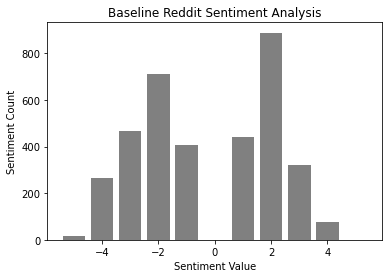

In [113]:
# Plot the data
plt.bar(senti_base['Value'], senti_base['Count'], color = 'grey')  # plot x-values, y-values, color
plt.xlabel('Sentiment Value')  # add x-label
plt.ylabel('Sentiment Count')  # add y-label
plt.title('Baseline Reddit Sentiment Analysis')  # add title
plt.show()


-5 subreddit_senti  25
-4 subreddit_senti  581
-3 subreddit_senti  1434
-2 subreddit_senti  2041
-1 subreddit_senti  1255
 0 subreddit_senti  0
 1 subreddit_senti  1302
 2 subreddit_senti  2293
 3 subreddit_senti  777
 4 subreddit_senti  191
 5 subreddit_senti  0


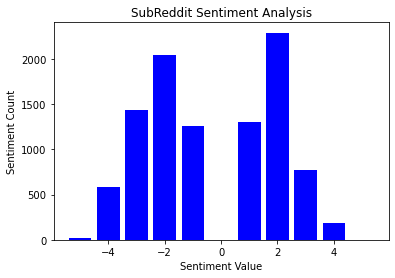

In [115]:
search_subreddit = reddit.subreddit('republican').top('month', limit = 50)  # pick the subreddit you want to select. Do you want to find top posts, or hot posts?, from what time period?, how many posts?
comments_subreddit = {"id": [], "comments": []}  # Create a dictionary for subreddit comments
for post in tqdm(search_subreddit, total = 50):
    submission = reddit.submission(id=post)
    submission.comments.replace_more(limit=0)  # This line of code expands the comments if “load more comments” and “continue this thread” links are encountered
    for top_level_comment in submission.comments:
        comments_subreddit["id"].append(top_level_comment.id)  # Saving ID into the dictionary
        comments_subreddit["comments"].append(top_level_comment.body)  # Saving comment into the dictionary
        
comments_subreddit_data = pd.DataFrame.from_dict(comments_subreddit, orient='index').T # Create a dataframe for the subreddit comments

sentimentfile = open("AFINN-en-165.txt", "r")  # open sentiment file
scores = {}  # an empty dictionary
for line in sentimentfile:  # loop over each word / sentiment score
    word, score = line.split("\t")  # file is tab-delimited
    scores[word] = int(score)  # convert the scores to intergers
    
for word in comments_subreddit_data.comments:  # loop over each word in dataframe
         commentWords = word.split()  # split comments into individual words
         for word in commentWords:  # loop over idndividual words in each comment
            word = word.strip('?:!.,;"!@()#-')  # remove extraneous characters
            word = word.replace("\n", "")  # remove end of line
            if word in scores.keys():  # check if word is in sentiment dictionary
                score = scores[word]  # check if word is in sentiment dictionary
                sentiments[str(score)] += 1  # add one to the score if 

subreddit_senti = []
subreddit_senti = pd.DataFrame(sentiments, index=['Count']).T.reset_index()  # Convert the sentiment dictionary to a data frame, transpose the data, and reset the index
subreddit_senti['Value'] = [-5,-4,-3,-2,-1,0,1,2,3,4,5]  # add a score column
subreddit_senti = subreddit_senti[['Value', 'Count']]  # Reorder the columns

print("-5 subreddit_senti ", sentiments["-5"])
print("-4 subreddit_senti ", sentiments["-4"])
print("-3 subreddit_senti ", sentiments["-3"])
print("-2 subreddit_senti ", sentiments["-2"])
print("-1 subreddit_senti ", sentiments["-1"])
print(" 0 subreddit_senti ", sentiments["0"])
print(" 1 subreddit_senti ", sentiments["1"])
print(" 2 subreddit_senti ", sentiments["2"])
print(" 3 subreddit_senti ", sentiments["3"])
print(" 4 subreddit_senti ", sentiments["4"])
print(" 5 subreddit_senti ", sentiments["5"])

plt.bar(subreddit_senti['Value'], subreddit_senti['Count'], color='blue')  # plot the data x-values, y-values, color
plt.xlabel('Sentiment Value')  # add x-label
plt.ylabel('Sentiment Count')  # add y-label
plt.title('SubReddit Sentiment Analysis')  # add title
plt.show()

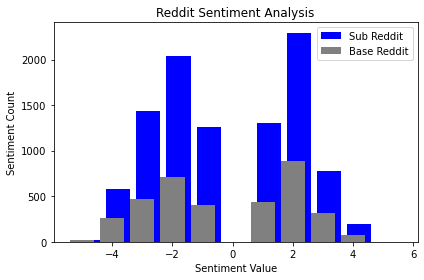

In [119]:
plt.bar(subreddit_senti['Value'] + 0.2,subreddit_senti['Count'], color='blue', label='Sub Reddit') # add subreddit data

plt.bar(senti_base['Value'], senti_base['Count'], color='grey', label='Base Reddit') # add baseline data
plt.legend() # add the legend

plt.xlabel('Sentiment Value')  # add x-label
plt.ylabel('Sentiment Count')  # add y-label
plt.title('Reddit Sentiment Analysis')  # add title
plt.tight_layout()  # tight layout makes it look nice
plt.show()  # show the plot

In [120]:
senti_base['Normalized']=senti_base['Count'] / senti_base['Count'].sum()  # Normalize the Count
senti_base

,Value,Count,Normalized
0,-5,17,0.004731
1,-4,265,0.073755
2,-3,466,0.129697
3,-2,713,0.198441
4,-1,407,0.113276
5,0,0,0.000000
6,1,442,0.123017
7,2,889,0.247426
8,3,319,0.088784
9,4,75,0.020874


In [121]:
subreddit_senti['Normalized'] = subreddit_senti['Count'] / subreddit_senti['Count'].sum()  # Normalize the Count
subreddit_senti

,Value,Count,Normalized
0,-5,25,0.002526
1,-4,581,0.058693
2,-3,1434,0.144863
3,-2,2041,0.206182
4,-1,1255,0.126780
5,0,0,0.000000
6,1,1302,0.131528
7,2,2293,0.231640
8,3,777,0.078493
9,4,191,0.019295


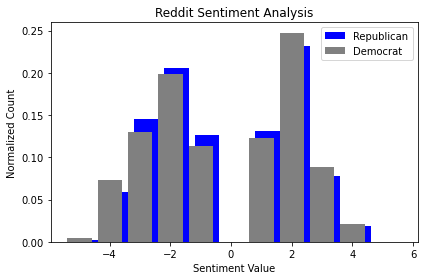

In [123]:
plt.bar(subreddit_senti['Value'] + 0.2 ,subreddit_senti['Normalized'], color='b', label = 'Republican')  # add subreddit data

plt.bar(senti_base['Value'], senti_base['Normalized'], color='grey', label = 'Democrat')  # add baseline data
plt.legend()  # add the legend

plt.xlabel('Sentiment Value')  # add x-label
plt.ylabel('Normalized Count')  # add y-label
plt.title('Reddit Sentiment Analysis')  # add title
plt.tight_layout()  # tight layout makes it look nice
plt.show()  # show the plot

In my assignment for sentiment analysis I chose two subreddits to compare overall sentiment for posters. Sentiment anaylsis is the process of assigning words a positive or negative value and then analyzing sentences (in this case comments and posts) for their overall sentiment score. This GENERALLY can be an indicator for how positive or negative the post (and the feelings of the poster) are. We were able to scrape for data from reddit by having credentials through creating an API on the site. The two (WHICH FOR CLARITY I DECIDED ON BEFORE FINISHING THROUGH TEH WALKTHROUGH VIDEO) were Republican and Democrats. My hunch was that there would be some drastic differences over the last month in positivity due to the recent inauguration (and literally everything else going on). My hunch was wrong. We need to normalize the results because if we were looking at sheer numbers it just isn't equitable. Much like judging crime rates on a small town vs a big city we need to view them "per capita" in order to get a clear picture of the rate of crime vs the literal numbers of crime. 

While there is minor evidence showing the Democrats reddit has high positivity scores from 2-5 and the Republican subreddit has higher negativity from -1 to -4. There are a few outliers but my hunch was that there was going to be a massive difference between the two (given Georgia Senate results as well. 

A few ways I want to explain this is that 1) before normalization there was a drastic difference between total sentiment scores and comments....I tried to pick two with similar total members but that does not necessarily correlate to the activity of subreddit. Secondly, While there are macro reasons that someone could think one party should be experience more positive sentiments there are still daily events that can affect that. Or, it's entirely possible that republicans arent as upset that trump is leaving as i would have thought. (I originally wanted to go with a trump vs biden subreddit but biden is virtually non-existent and the trump subreddit is private {and thus gave me a http 403 error when trying to scrape} and i couldnt bring myself to ask to join) 


(i do not know what "Type Markdown and LaTeX:  𝛼2" means)